In [1]:
import pandas as pd

# Saving indicators data

In [2]:
GDP = pd.read_csv("data/economic_indicators/GDP")
FEDFUNDS = pd.read_csv("data/economic_indicators/FEDFUNDS")
CPIAUCSL = pd.read_csv("data/economic_indicators/CPIAUCSL")
UNRATE = pd.read_csv("data/economic_indicators/UNRATE")
GS10 = pd.read_csv("data/economic_indicators/GS10")
INDPRO = pd.read_csv("data/economic_indicators/INDPRO")
PPIACO = pd.read_csv("data/economic_indicators/PPIACO")
RSXFS = pd.read_csv("data/economic_indicators/RSXFS")
HOUST = pd.read_csv("data/economic_indicators/HOUST")
PSAVERT = pd.read_csv("data/economic_indicators/PSAVERT")




In [3]:
indicators = [
            GDP, CPIAUCSL, UNRATE, FEDFUNDS, GS10,
        INDPRO, PPIACO, RSXFS, HOUST, PSAVERT
    ]
for ind in indicators:
    print(ind.shape)

(309, 2)
(928, 2)
(916, 2)
(838, 2)
(853, 2)
(1264, 2)
(1336, 2)
(388, 2)
(784, 2)
(783, 2)


In [4]:
for ind in indicators:
    ind.columns = ['Date', ind.columns[1]]

# Merging based on the Date column
merged_df = GDP
for ind in indicators[1:]:
    merged_df = pd.merge(merged_df, ind, on='Date', how='outer')

print(merged_df.shape)

(1336, 11)


In [5]:
merged_df.dropna(inplace=True)


In [6]:
merged_df.shape

(129, 11)

In [7]:
merged_df.to_csv("./data/indicators.csv")

# Get historical data for investment

In [8]:
from data_collection.collect_num_data import get_economic_indicators, get_historical_prices, get_dividends_and_earnings


In [9]:
import matplotlib.pyplot as plt


In [10]:
for symbol in ["GOOG"]:
    hist_data = get_historical_prices(symbol)
    try:
        hist_data.index = pd.to_datetime(hist_data.index)
        hist_data.index = hist_data.index.strftime('%Y-%m-%d')
    except Exception as e:
        print(e)
    hist_data.to_csv(f"./data/historical/{symbol}.csv")


In [11]:
indicators_df = pd.read_csv("data/indicators.csv")

In [12]:
indicators_df.drop(columns=["Unnamed: 0"],inplace=True)

In [13]:
goog_df =  pd.read_csv("data/historical/GOOG.csv")
jpm_df =  pd.read_csv("data/historical/JPM.csv")
msft_df =  pd.read_csv("data/historical/MSFT.csv")
nvda_df =  pd.read_csv("data/historical/NVDA.csv")
voo_df =  pd.read_csv("data/historical/VOO.csv")

In [14]:
dataframes = {
    'GOOG': goog_df,
}

In [15]:
combined_df = pd.concat([df.set_index('Date') for df in dataframes.values()], axis=1, keys=dataframes.keys())
combined_df.reset_index(inplace=True)

In [16]:
combined_df

Date        GOOG                                               
                        Open        High         Low       Close     Volume
0     2004-08-19    2.484562    2.585436    2.384187    2.493011  897427216
1     2004-08-20    2.509657    2.710161    2.496986    2.691030  458857488
2     2004-08-23    2.751654    2.819482    2.709416    2.718112  366857939
3     2004-08-24    2.763828    2.772772    2.573262    2.605561  306396159
4     2004-08-25    2.607797    2.683328    2.580964    2.633636  184645512
...          ...         ...         ...         ...         ...        ...
5049  2024-09-11  151.089996  152.479996  148.699997  152.149994   18991500
5050  2024-09-12  154.809998  155.610001  153.500000  155.539993   21024100
5051  2024-09-13  156.362000  159.274994  156.110001  158.369995   16733900
5052  2024-09-16  158.330002  159.240005  157.610001  158.990005   14157600
5053  2024-09-17  160.089996  161.580002  159.410004  160.279999   12050985

[5054 rows x 6 columns]

In [17]:
indicators_df['Date'] = pd.to_datetime(indicators_df['Date'])
combined_df['Date'] = pd.to_datetime(combined_df['Date'])


In [18]:
# Flatten MultiIndex columns
combined_df.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in combined_df.columns]

# Ensure Date column is correctly named
if 'Date_' in combined_df.columns:
    combined_df.rename(columns={'Date_': 'Date'}, inplace=True)


In [19]:
full_df = pd.merge(combined_df, indicators_df, on='Date', how='left')


In [20]:
full_df

,Date,GOOG_Open,GOOG_High,GOOG_Low,GOOG_Close,GOOG_Volume,GDP,CPIAUCSL,UNRATE,FEDFUNDS,GS10,INDPRO,PPIACO,RSXFS,HOUST,PSAVERT
0,2004-08-19,2.484562,2.585436,2.384187,2.493011,897427216,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2004-08-20,2.509657,2.710161,2.496986,2.691030,458857488,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2004-08-23,2.751654,2.819482,2.709416,2.718112,366857939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2004-08-24,2.763828,2.772772,2.573262,2.605561,306396159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2004-08-25,2.607797,2.683328,2.580964,2.633636,184645512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5049,2024-09-11,151.089996,152.479996,148.699997,152.149994,18991500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5050,2024-09-12,154.809998,155.610001,153.500000,155.539993,21024100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5051,2024-09-13,156.362000,159.274994,156.110001,158.369995,16733900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5052,2024-09-16,158.330002,159.240005,157.610001,158.990005,14157600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# from sklearn.impute import KNNImputer
# imputer = KNNImputer(n_neighbors=5)


In [22]:
full_df_imputed = full_df.copy()
full_df_imputed.fillna(method='ffill', inplace=True)
full_df_imputed.fillna(method='bfill', inplace=True)

C:\Users\Rj\AppData\Local\Temp\ipykernel_15160\1863980241.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  full_df_imputed.fillna(method='ffill', inplace=True)
C:\Users\Rj\AppData\Local\Temp\ipykernel_15160\1863980241.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  full_df_imputed.fillna(method='bfill', inplace=True)


In [23]:
full_df_imputed

,Date,GOOG_Open,GOOG_High,GOOG_Low,GOOG_Close,GOOG_Volume,GDP,CPIAUCSL,UNRATE,FEDFUNDS,GS10,INDPRO,PPIACO,RSXFS,HOUST,PSAVERT
0,2004-08-19,2.484562,2.585436,2.384187,2.493011,897427216,12527.214,190.800,5.5,1.76,4.1,94.5671,150.000,295115.0,2072.0,3.9
1,2004-08-20,2.509657,2.710161,2.496986,2.691030,458857488,12527.214,190.800,5.5,1.76,4.1,94.5671,150.000,295115.0,2072.0,3.9
2,2004-08-23,2.751654,2.819482,2.709416,2.718112,366857939,12527.214,190.800,5.5,1.76,4.1,94.5671,150.000,295115.0,2072.0,3.9
3,2004-08-24,2.763828,2.772772,2.573262,2.605561,306396159,12527.214,190.800,5.5,1.76,4.1,94.5671,150.000,295115.0,2072.0,3.9
4,2004-08-25,2.607797,2.683328,2.580964,2.633636,184645512,12527.214,190.800,5.5,1.76,4.1,94.5671,150.000,295115.0,2072.0,3.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5049,2024-09-11,151.089996,152.479996,148.699997,152.149994,18991500,25994.639,294.977,3.5,1.68,2.9,103.1328,272.274,589039.0,1392.0,3.5
5050,2024-09-12,154.809998,155.610001,153.500000,155.539993,21024100,25994.639,294.977,3.5,1.68,2.9,103.1328,272.274,589039.0,1392.0,3.5
5051,2024-09-13,156.362000,159.274994,156.110001,158.369995,16733900,25994.639,294.977,3.5,1.68,2.9,103.1328,272.274,589039.0,1392.0,3.5
5052,2024-09-16,158.330002,159.240005,157.610001,158.990005,14157600,25994.639,294.977,3.5,1.68,2.9,103.1328,272.274,589039.0,1392.0,3.5


In [24]:
full_df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5054 entries, 0 to 5053
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         5054 non-null   datetime64[ns]
 1   GOOG_Open    5054 non-null   float64       
 2   GOOG_High    5054 non-null   float64       
 3   GOOG_Low     5054 non-null   float64       
 4   GOOG_Close   5054 non-null   float64       
 5   GOOG_Volume  5054 non-null   int64         
 6   GDP          5054 non-null   float64       
 7   CPIAUCSL     5054 non-null   float64       
 8   UNRATE       5054 non-null   float64       
 9   FEDFUNDS     5054 non-null   float64       
 10  GS10         5054 non-null   float64       
 11  INDPRO       5054 non-null   float64       
 12  PPIACO       5054 non-null   float64       
 13  RSXFS        5054 non-null   float64       
 14  HOUST        5054 non-null   float64       
 15  PSAVERT      5054 non-null   float64       
dtypes: dat

In [25]:
full_df_imputed.isnull().sum()

Date           0
GOOG_Open      0
GOOG_High      0
GOOG_Low       0
GOOG_Close     0
GOOG_Volume    0
GDP            0
CPIAUCSL       0
UNRATE         0
FEDFUNDS       0
GS10           0
INDPRO         0
PPIACO         0
RSXFS          0
HOUST          0
PSAVERT        0
dtype: int64

In [26]:
import numpy as np

# Feature Engineering


In [27]:
stocks = ['GOOG']
economic_indicators = ['GDP', 'CPIAUCSL', 'UNRATE', 'FEDFUNDS', 'GS10', 'INDPRO', 'PPIACO', 'RSXFS', 'HOUST', 'PSAVERT']


In [28]:
# Log Returns for each stock (Relevant for modeling risk and capturing the stock's behavior over time)
for stock in stocks:
    full_df_imputed[f'{stock}_LogReturn'] = np.log(full_df_imputed[f'{stock}_Close'] / full_df_imputed[f'{stock}_Close'].shift(1))


In [29]:
full_df_imputed.tail()

,Date,GOOG_Open,GOOG_High,GOOG_Low,GOOG_Close,GOOG_Volume,GDP,CPIAUCSL,UNRATE,FEDFUNDS,GS10,INDPRO,PPIACO,RSXFS,HOUST,PSAVERT,GOOG_LogReturn
5049,2024-09-11,151.089996,152.479996,148.699997,152.149994,18991500,25994.639,294.977,3.5,1.68,2.9,103.1328,272.274,589039.0,1392.0,3.5,0.014165
5050,2024-09-12,154.809998,155.610001,153.500000,155.539993,21024100,25994.639,294.977,3.5,1.68,2.9,103.1328,272.274,589039.0,1392.0,3.5,0.022036
5051,2024-09-13,156.362000,159.274994,156.110001,158.369995,16733900,25994.639,294.977,3.5,1.68,2.9,103.1328,272.274,589039.0,1392.0,3.5,0.018031
5052,2024-09-16,158.330002,159.240005,157.610001,158.990005,14157600,25994.639,294.977,3.5,1.68,2.9,103.1328,272.274,589039.0,1392.0,3.5,0.003907
5053,2024-09-17,160.089996,161.580002,159.410004,160.279999,12050985,25994.639,294.977,3.5,1.68,2.9,103.1328,272.274,589039.0,1392.0,3.5,0.008081


In [30]:
# Rolling Volatility for each stock (Relevant for identifying periods of high/low risk)
for stock in stocks:
    full_df_imputed[f'{stock}_RollingVolatility_30d'] = full_df_imputed[f'{stock}_LogReturn'].rolling(window=30).std()


In [31]:
# Percentage changes in economic indicators (Capture macroeconomic shifts and trends, important for risk modeling)
for indicator in economic_indicators:
    full_df_imputed[f'{indicator}_PctChange'] = full_df_imputed[indicator].pct_change()


In [32]:
# Moving averages of stock closing prices (Relevant for identifying trends and stock behavior over time)
for stock in stocks:
    full_df_imputed[f'{stock}_MA10'] = full_df_imputed[f'{stock}_Close'].rolling(window=10).mean()  # Short-term trend
    full_df_imputed[f'{stock}_MA200'] = full_df_imputed[f'{stock}_Close'].rolling(window=200).mean()  # Long-term trend


In [33]:
# Lag features for log returns and economic indicators (Relevant for capturing past behavior and predicting future movements)
lags = [1, 5, 10]
for stock in stocks:
    for lag in lags:
        full_df_imputed[f'{stock}_LogReturn_Lag{lag}'] = full_df_imputed[f'{stock}_LogReturn'].shift(lag)

for indicator in economic_indicators:
    for lag in lags:
        full_df_imputed[f'{indicator}_PctChange_Lag{lag}'] = full_df_imputed[f'{indicator}_PctChange'].shift(lag)

In [34]:
# Maximum drawdown for each stock (Capture the largest loss from peak to trough, relevant for modeling worst-case scenarios)
for stock in stocks:
    full_df_imputed[f'{stock}_MaxDrawdown'] = full_df_imputed[f'{stock}_Close'].rolling(window=252, min_periods=1).apply(lambda x: (x.max() - x.min()) / x.max(), raw=True)

In [35]:
# Rolling correlation between stock log returns (Relevant for understanding stock relationships, which can impact portfolio risk)
for i, stock1 in enumerate(stocks):
    for stock2 in stocks[i+1:]:
        full_df_imputed[f'{stock1}_{stock2}_RollingCorr_30d'] = full_df_imputed[f'{stock1}_LogReturn'].rolling(window=30).corr(full_df_imputed[f'{stock2}_LogReturn'])

In [36]:
# Rolling correlation between stock returns and economic indicators (Capture how economic factors affect stock movements)
for stock in stocks:
    for indicator in economic_indicators:
        full_df_imputed[f'{stock}_{indicator}_RollingCorr_30d'] = full_df_imputed[f'{stock}_LogReturn'].rolling(window=30).corr(full_df_imputed[f'{indicator}_PctChange'])


In [37]:
# Outlier detection (Flagging large returns for risk identification, which may indicate unusual events or risks)
for stock in stocks:
    full_df_imputed[f'{stock}_Outliers'] = np.abs(full_df_imputed[f'{stock}_LogReturn']) > (full_df_imputed[f'{stock}_LogReturn'].mean() + 3 * full_df_imputed[f'{stock}_LogReturn'].std())

In [38]:
full_df_imputed.isnull().sum()

Date                               0
GOOG_Open                          0
GOOG_High                          0
GOOG_Low                           0
GOOG_Close                         0
                                ... 
GOOG_PPIACO_RollingCorr_30d     3944
GOOG_RSXFS_RollingCorr_30d      3914
GOOG_HOUST_RollingCorr_30d      3914
GOOG_PSAVERT_RollingCorr_30d    3914
GOOG_Outliers                      0
Length: 75, dtype: int64

In [39]:
full_df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5054 entries, 0 to 5053
Data columns (total 75 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Date                           5054 non-null   datetime64[ns]
 1   GOOG_Open                      5054 non-null   float64       
 2   GOOG_High                      5054 non-null   float64       
 3   GOOG_Low                       5054 non-null   float64       
 4   GOOG_Close                     5054 non-null   float64       
 5   GOOG_Volume                    5054 non-null   int64         
 6   GDP                            5054 non-null   float64       
 7   CPIAUCSL                       5054 non-null   float64       
 8   UNRATE                         5054 non-null   float64       
 9   FEDFUNDS                       5054 non-null   float64       
 10  GS10                           5054 non-null   float64       
 11  INDPRO           

In [40]:
# Drop NaN values caused by the shift and rolling operations
full_df_imputed.fillna(method='ffill', inplace=True)
full_df_imputed.fillna(method='bfill', inplace=True)

C:\Users\Rj\AppData\Local\Temp\ipykernel_15160\2336861955.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  full_df_imputed.fillna(method='ffill', inplace=True)
C:\Users\Rj\AppData\Local\Temp\ipykernel_15160\2336861955.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  full_df_imputed.fillna(method='bfill', inplace=True)


In [41]:
boolean_columns = full_df_imputed.select_dtypes(include='bool').columns
full_df_imputed[boolean_columns] = full_df_imputed[boolean_columns].astype(int)


In [42]:
full_df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5054 entries, 0 to 5053
Data columns (total 75 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Date                           5054 non-null   datetime64[ns]
 1   GOOG_Open                      5054 non-null   float64       
 2   GOOG_High                      5054 non-null   float64       
 3   GOOG_Low                       5054 non-null   float64       
 4   GOOG_Close                     5054 non-null   float64       
 5   GOOG_Volume                    5054 non-null   int64         
 6   GDP                            5054 non-null   float64       
 7   CPIAUCSL                       5054 non-null   float64       
 8   UNRATE                         5054 non-null   float64       
 9   FEDFUNDS                       5054 non-null   float64       
 10  GS10                           5054 non-null   float64       
 11  INDPRO           

In [43]:
full_df_imputed

,Date,GOOG_Open,GOOG_High,GOOG_Low,GOOG_Close,GOOG_Volume,GDP,CPIAUCSL,UNRATE,FEDFUNDS,...,GOOG_CPIAUCSL_RollingCorr_30d,GOOG_UNRATE_RollingCorr_30d,GOOG_FEDFUNDS_RollingCorr_30d,GOOG_GS10_RollingCorr_30d,GOOG_INDPRO_RollingCorr_30d,GOOG_PPIACO_RollingCorr_30d,GOOG_RSXFS_RollingCorr_30d,GOOG_HOUST_RollingCorr_30d,GOOG_PSAVERT_RollingCorr_30d,GOOG_Outliers
0,2004-08-19,2.484562,2.585436,2.384187,2.493011,897427216,12527.214,190.800,5.5,1.76,...,0.008656,-0.008656,0.008656,0.008656,0.008656,0.008656,0.008656,-0.008656,-0.008656,0
1,2004-08-20,2.509657,2.710161,2.496986,2.691030,458857488,12527.214,190.800,5.5,1.76,...,0.008656,-0.008656,0.008656,0.008656,0.008656,0.008656,0.008656,-0.008656,-0.008656,1
2,2004-08-23,2.751654,2.819482,2.709416,2.718112,366857939,12527.214,190.800,5.5,1.76,...,0.008656,-0.008656,0.008656,0.008656,0.008656,0.008656,0.008656,-0.008656,-0.008656,0
3,2004-08-24,2.763828,2.772772,2.573262,2.605561,306396159,12527.214,190.800,5.5,1.76,...,0.008656,-0.008656,0.008656,0.008656,0.008656,0.008656,0.008656,-0.008656,-0.008656,0
4,2004-08-25,2.607797,2.683328,2.580964,2.633636,184645512,12527.214,190.800,5.5,1.76,...,0.008656,-0.008656,0.008656,0.008656,0.008656,0.008656,0.008656,-0.008656,-0.008656,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5049,2024-09-11,151.089996,152.479996,148.699997,152.149994,18991500,25994.639,294.977,3.5,1.68,...,-0.047350,0.047350,-0.047350,-0.047350,-0.047350,-0.047350,0.047350,0.047350,-0.047350,0
5050,2024-09-12,154.809998,155.610001,153.500000,155.539993,21024100,25994.639,294.977,3.5,1.68,...,-0.047350,0.047350,-0.047350,-0.047350,-0.047350,-0.047350,0.047350,0.047350,-0.047350,0
5051,2024-09-13,156.362000,159.274994,156.110001,158.369995,16733900,25994.639,294.977,3.5,1.68,...,-0.047350,0.047350,-0.047350,-0.047350,-0.047350,-0.047350,0.047350,0.047350,-0.047350,0
5052,2024-09-16,158.330002,159.240005,157.610001,158.990005,14157600,25994.639,294.977,3.5,1.68,...,-0.047350,0.047350,-0.047350,-0.047350,-0.047350,-0.047350,0.047350,0.047350,-0.047350,0


In [44]:
full_df_imputed.isnull().sum()

Date                            0
GOOG_Open                       0
GOOG_High                       0
GOOG_Low                        0
GOOG_Close                      0
                               ..
GOOG_PPIACO_RollingCorr_30d     0
GOOG_RSXFS_RollingCorr_30d      0
GOOG_HOUST_RollingCorr_30d      0
GOOG_PSAVERT_RollingCorr_30d    0
GOOG_Outliers                   0
Length: 75, dtype: int64

# Modeling

In [45]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.layers import GRU
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow.keras import regularizers
from kerastuner.tuners import RandomSearch  # Hyperparameter tuning
from tensorflow.keras.callbacks import EarlyStopping

C:\Users\Rj\AppData\Local\Temp\ipykernel_15160\1734887015.py:13: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch  # Hyperparameter tuning


In [46]:
# Define a function to create the model for hyperparameter tuning
def build_model(hp):
    model = Sequential()
    
    # Add Bidirectional LSTM layer
    model.add(Bidirectional(LSTM(hp.Int('lstm_units', min_value=32, max_value=128, step=16), 
                                 activation='relu', return_sequences=True, 
                                 kernel_regularizer=regularizers.l2(hp.Float('l2', 1e-4, 1e-2, sampling='log')),
                                 input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]))))
    
    # Add GRU layers
    model.add(GRU(hp.Int('gru_units_1', min_value=32, max_value=128, step=16), activation='relu', return_sequences=True))
    model.add(GRU(hp.Int('gru_units_2', min_value=32, max_value=128, step=16), activation='relu'))
    
    # Add Dropout
    model.add(Dropout(hp.Float('dropout', min_value=0.1, max_value=0.5, step=0.1)))

    # Output layer
    model.add(Dense(1))

    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.Nadam(hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')),
                  loss='mean_squared_error')

    return model

In [47]:
early_stopping = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)

In [48]:
# Hyperparameter Tuning: Using Keras Tuner
def tune_hyperparameters(X_train_reshaped, y_train, X_test_reshaped, y_test):
    tuner = RandomSearch(
        build_model,
        objective='val_loss',
        max_trials=5,  # Try 5 different sets of hyperparameters
        executions_per_trial=1,
        directory='my_dir',
        project_name='lstm_gru_tuning'
    )

    tuner.search(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_data=(X_test_reshaped, y_test), callbacks=[early_stopping])

    # Get the optimal hyperparameters
    best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
    print(f"Best hyperparameters: LSTM Units: {best_hps.get('lstm_units')}, GRU Units: {best_hps.get('gru_units_1')}, Learning Rate: {best_hps.get('learning_rate')}, Dropout: {best_hps.get('dropout')}")
    
    return best_hps

In [49]:
def train_model(X_train_reshaped, X_test_reshaped, y_train, y_test):
    # Tune hyperparameters
    best_hps = tune_hyperparameters(X_train_reshaped, y_train, X_test_reshaped, y_test)
    
    # Build the model using the best hyperparameters
    model = build_model(best_hps)

    # Train the model
    history = model.fit(X_train_reshaped, y_train, epochs=100, batch_size=32, validation_data=(X_test_reshaped, y_test), verbose=1, callbacks=[early_stopping])

    # Predict on test set
    y_pred = model.predict(X_test_reshaped)

    return model, y_pred, history, best_hps

In [50]:
# Function to plot actual vs predicted values
def plot_predictions(y_test, y_pred, target_variable):
    plt.figure(figsize=(10, 6))
    plt.plot(y_test, label=f'Actual {target_variable}')
    plt.plot(y_pred, label=f'Predicted {target_variable}')
    plt.title(f'Actual vs Predicted {target_variable}')
    plt.legend()
    plt.show()

In [51]:
# Function to plot loss curve
def plot_loss(history, target_variable):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Loss Curve for {target_variable}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [52]:
# Function to perform VaR backtesting
def backtest_var(y_test, y_pred, target_variable):
    # Calculate exceedances
    exceedances = (y_test < y_pred.flatten()).sum()
    exceedance_ratio = exceedances / len(y_test)
    print(f'Number of exceedances for {target_variable}: {exceedances}')
    print(f'Exceedance ratio for {target_variable}: {exceedance_ratio}')
    
    # Plot exceedances where actual return is less than predicted VaR
    plt.figure(figsize=(10, 6))
    plt.plot(y_test, label=f'Actual {target_variable}', color='blue')
    plt.plot(y_pred, label=f'Predicted VaR for {target_variable}', color='red')
    plt.fill_between(range(len(y_test)), y_pred.flatten(), np.min(y_test), where=y_test < y_pred.flatten(), color='green', label='Exceedance')
    plt.title(f'VaR Exceedance Visualization for {target_variable}')
    plt.legend()
    plt.show()
    
    return exceedance_ratio

In [53]:
# Function to calculate the risk score
def calculate_risk_score(y_test, y_pred, exceedance_ratio):
    # Calculate Mean Absolute Error (MAE)
    mae = mean_absolute_error(y_test, y_pred)
    
    # Define a risk score based on the exceedance ratio and MAE
    # Example: Higher exceedance ratio and larger MAE indicate higher risk
    risk_score = (exceedance_ratio * 100) + mae * 10  # Scaling MAE to a comparable range
    print(f'Risk Score: {risk_score}')
    
    return risk_score

In [54]:
# List of target variables
target_stock='GOOG'
target_variables = {
    'Log Return': f'{target_stock}_LogReturn',
    'Volatility': f'{target_stock}_RollingVolatility_30d',
    'Max Drawdown': f'{target_stock}_MaxDrawdown'
}

# Scale the features (excluding the 'Date' and target variable columns)
features = full_df_imputed.columns.difference(['Date', 'GOOG_LogReturn', 'GOOG_RollingVolatility_30d', 'GOOG_MaxDrawdown'])
scaler = MinMaxScaler()
df_scaled = full_df_imputed.copy()
df_scaled[features] = scaler.fit_transform(full_df_imputed[features])

# Dictionary to store models, predictions, and histories
model_dict = {}

In [55]:
# Train-test split and reshape for each target variable
for name, target_variable in target_variables.items():
    print(f'Creating model for {name} ({target_variable})...')
    
    # Create feature matrix (X) and target vector (y)
    X = df_scaled[features].values
    y = df_scaled[target_variable].values

    # Train-test split (80% training, 20% testing)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    # Reshape to 3D [samples, time steps, features] for LSTM input
    X_train_reshaped = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_test_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
    
    # Train the model and store results in the dictionary
    model, y_pred, history, best_hps = train_model(X_train_reshaped, X_test_reshaped, y_train, y_test)
    model_dict[name] = {
        'model': model,
        'y_pred': y_pred,
        'y_test': y_test,
        'history': history,
        'target_variable': target_variable,
        'best_hps': best_hps
    }

E:\Personal\Risk_management_model\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Creating model for Log Return (GOOG_LogReturn)...
Reloading Tuner from my_dir\lstm_gru_tuning\tuner0.json
Best hyperparameters: LSTM Units: 64, GRU Units: 48, Learning Rate: 0.0003356286726472511, Dropout: 0.4
Epoch 1/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - loss: 0.8341 - val_loss: 0.3891
Epoch 2/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.3064 - val_loss: 0.1302
Epoch 3/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.1000 - val_loss: 0.0384
Epoch 4/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0287 - val_loss: 0.0099
Epoch 5/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0073 - val_loss: 0.0024
Epoch 6/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0018 - val_loss: 7.3658e-04
Epoch 7/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5.9614e-04 - val_loss: 4.2813e-04
Epoch 8/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4.0520e-04 - val_loss: 3.8112e-04
Epoch 9/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.6168e-04

In [56]:
model_dict

{'Log Return': {'model': <Sequential name=sequential, built=True>,
  'y_pred': array([[0.00070699],
         [0.00070699],
         [0.00070699],
         ...,
         [0.00070699],
         [0.00070699],
         [0.00070699]], dtype=float32),
  'y_test': array([-0.01614804, -0.00740319, -0.00094756, ...,  0.01803115,
          0.00390731,  0.00808094]),
  'history': <keras.src.callbacks.history.History at 0x1ba77e4c200>,
  'target_variable': 'GOOG_LogReturn',
  'best_hps': <keras_tuner.src.engine.hyperparameters.hyperparameters.HyperParameters at 0x1ba4e3a6570>},
 'Volatility': {'model': <Sequential name=sequential_1, built=True>,
  'y_pred': array([[0.01769894],
         [0.01769851],
         [0.01769882],
         ...,
         [0.02071759],
         [0.02072227],
         [0.02072082]], dtype=float32),
  'y_test': array([0.0201956 , 0.02020962, 0.01929109, ..., 0.01842223, 0.01802454,
         0.01593796]),
  'history': <keras.src.callbacks.history.History at 0x1ba7fc689e0>,
  '


Evaluating model for Log Return (GOOG_LogReturn)...


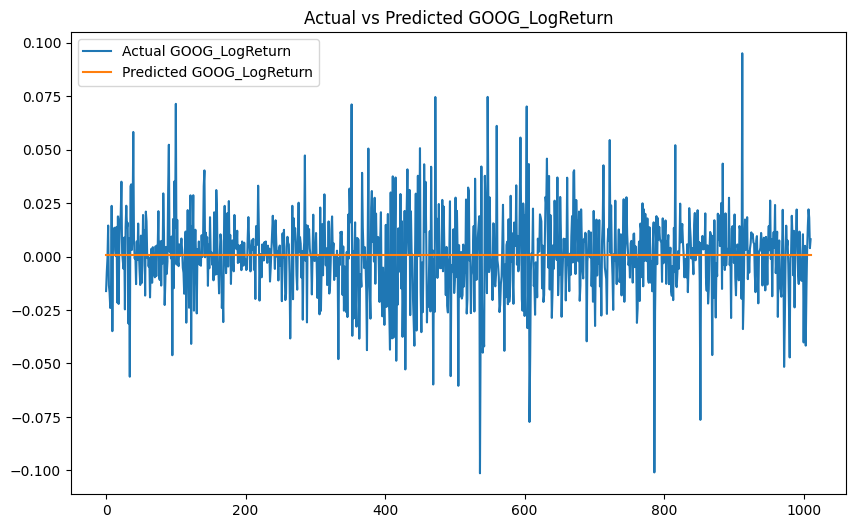


Evaluating model for Volatility (GOOG_RollingVolatility_30d)...


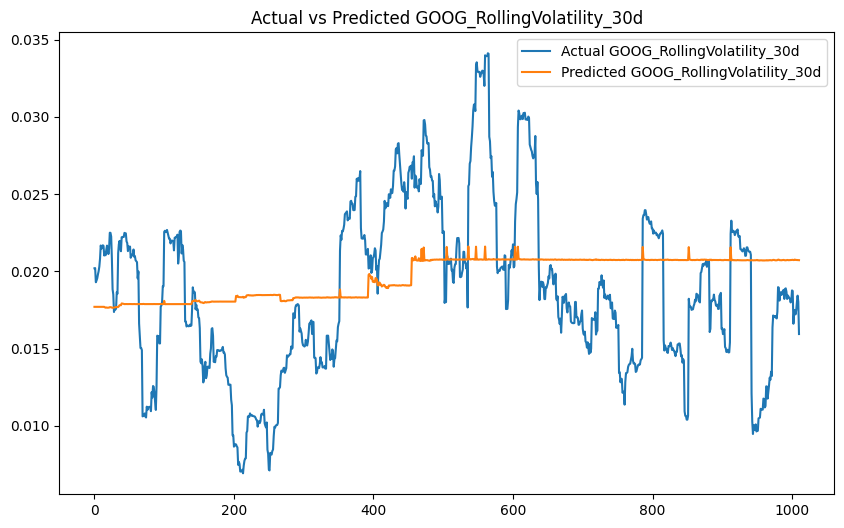


Evaluating model for Max Drawdown (GOOG_MaxDrawdown)...


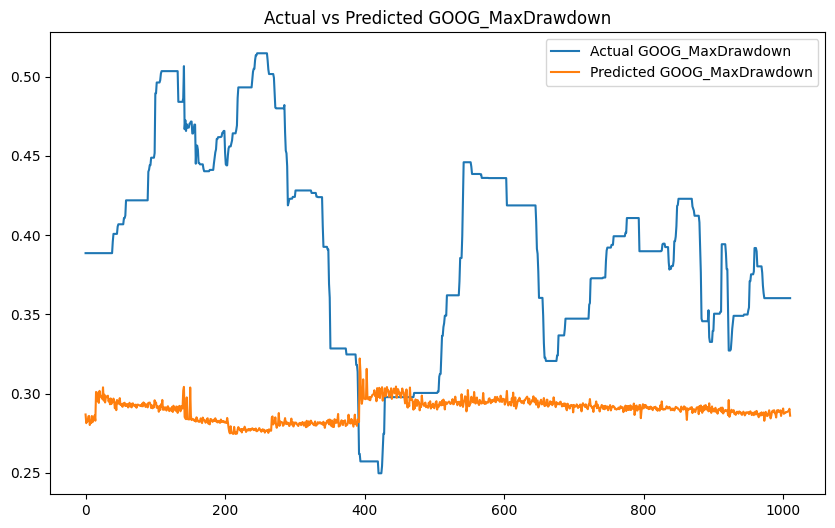

In [57]:
# Plotting and backtesting outside the training loop
for name, data in model_dict.items():
    print(f'\nEvaluating model for {name} ({data["target_variable"]})...')
    plot_predictions(data['y_test'], data['y_pred'], data['target_variable'])


Evaluating model for Log Return (GOOG_LogReturn)...
Number of exceedances for GOOG_LogReturn: 480
Exceedance ratio for GOOG_LogReturn: 0.47477744807121663


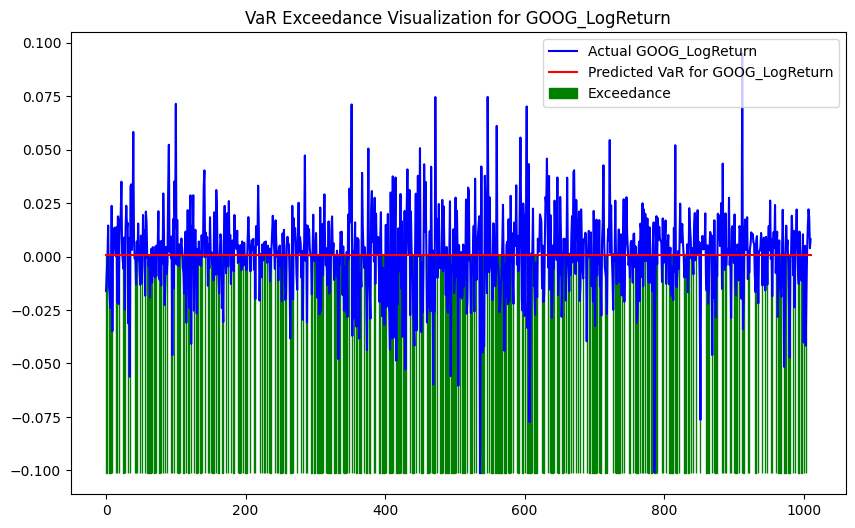


Evaluating model for Volatility (GOOG_RollingVolatility_30d)...
Number of exceedances for GOOG_RollingVolatility_30d: 613
Exceedance ratio for GOOG_RollingVolatility_30d: 0.6063303659742829


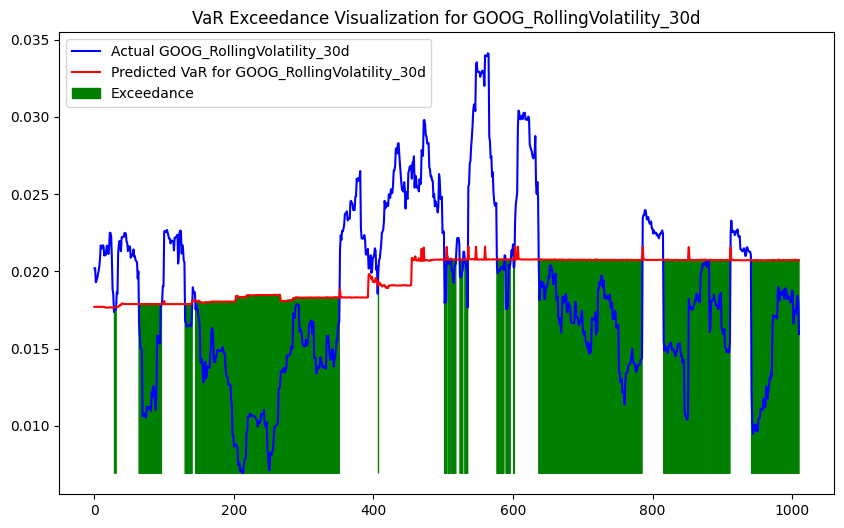


Evaluating model for Max Drawdown (GOOG_MaxDrawdown)...
Number of exceedances for GOOG_MaxDrawdown: 64
Exceedance ratio for GOOG_MaxDrawdown: 0.06330365974282888


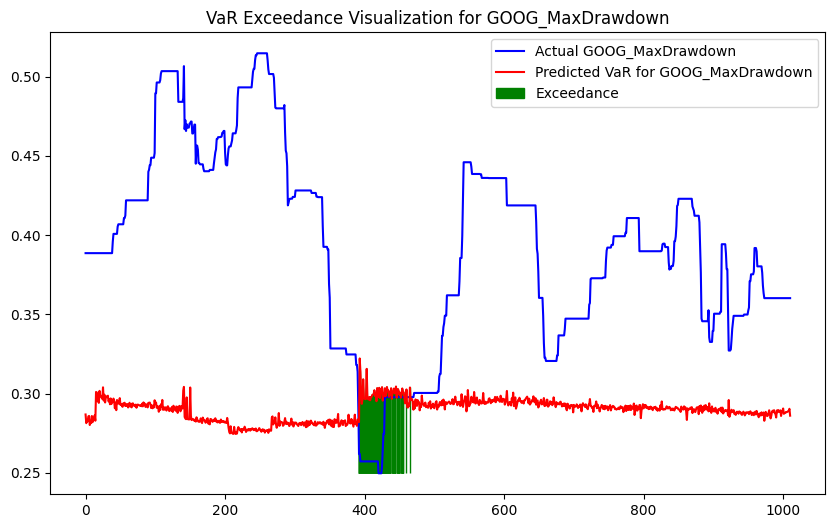

In [58]:
# Plotting and backtesting outside the training loop
for name, data in model_dict.items():
    print(f'\nEvaluating model for {name} ({data["target_variable"]})...')
   
    # Perform VaR backtesting
    backtest_var(data['y_test'], data['y_pred'], data['target_variable'])


Evaluating model for Log Return (GOOG_LogReturn)...
Number of exceedances for GOOG_LogReturn: 480
Exceedance ratio for GOOG_LogReturn: 0.47477744807121663


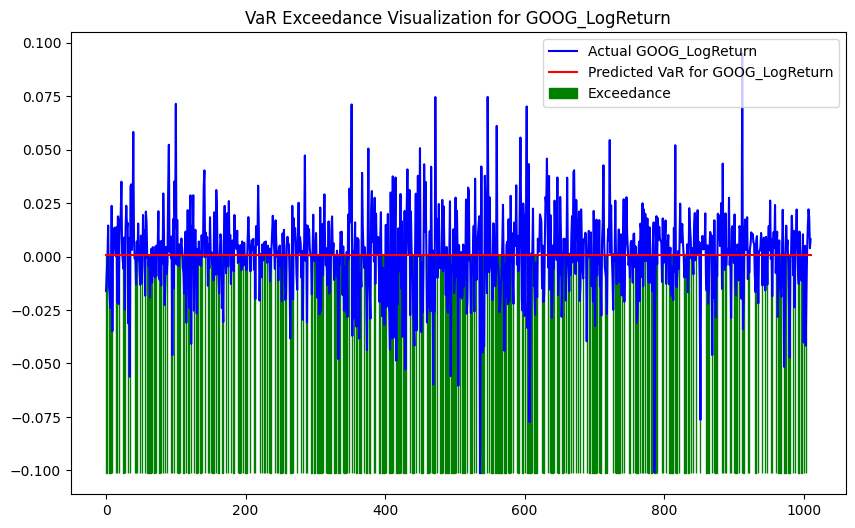

Risk Score: 47.617677153616704

Evaluating model for Volatility (GOOG_RollingVolatility_30d)...
Number of exceedances for GOOG_RollingVolatility_30d: 613
Exceedance ratio for GOOG_RollingVolatility_30d: 0.6063303659742829


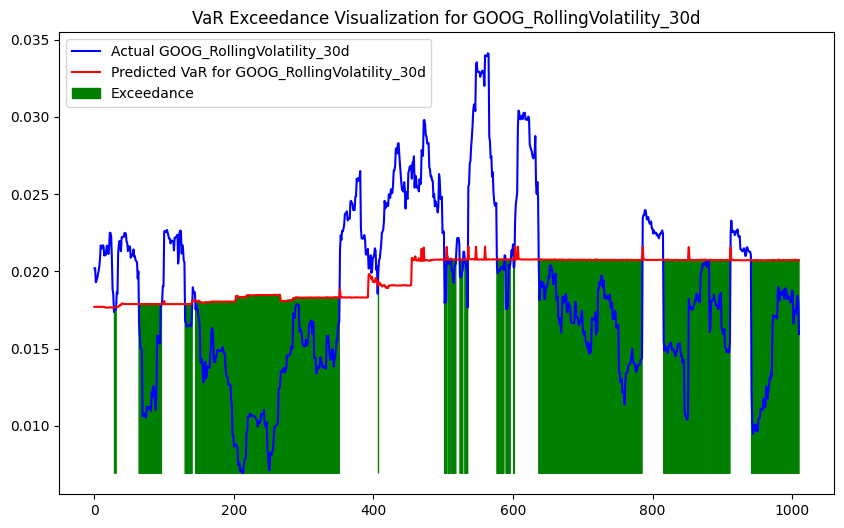

Risk Score: 60.67760496882015

Evaluating model for Max Drawdown (GOOG_MaxDrawdown)...
Number of exceedances for GOOG_MaxDrawdown: 64
Exceedance ratio for GOOG_MaxDrawdown: 0.06330365974282888


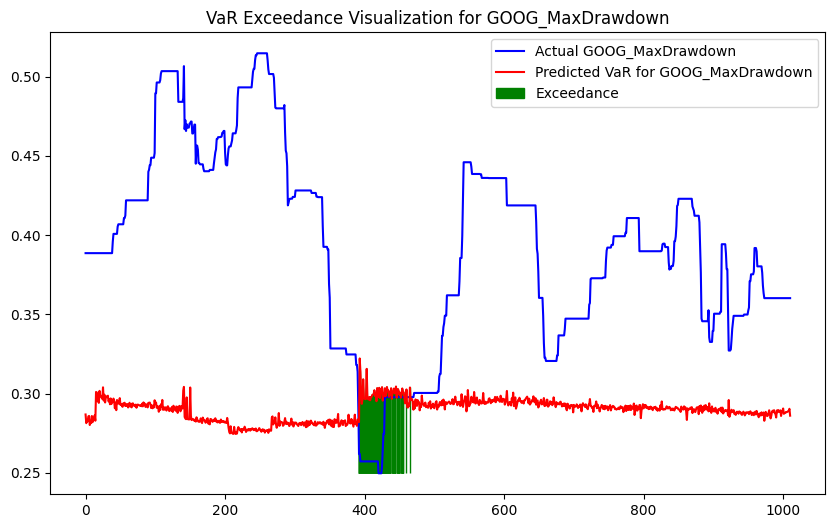

Risk Score: 7.391653204952658


In [59]:
# Plotting, backtesting, and risk score calculation outside the training loop
for name, data in model_dict.items():
    print(f'\nEvaluating model for {name} ({data["target_variable"]})...')
        
    # Perform VaR backtesting and get the exceedance ratio
    exceedance_ratio = backtest_var(data['y_test'], data['y_pred'], data['target_variable'])
    
    # Calculate risk score
    risk_score = calculate_risk_score(data['y_test'], data['y_pred'], exceedance_ratio)

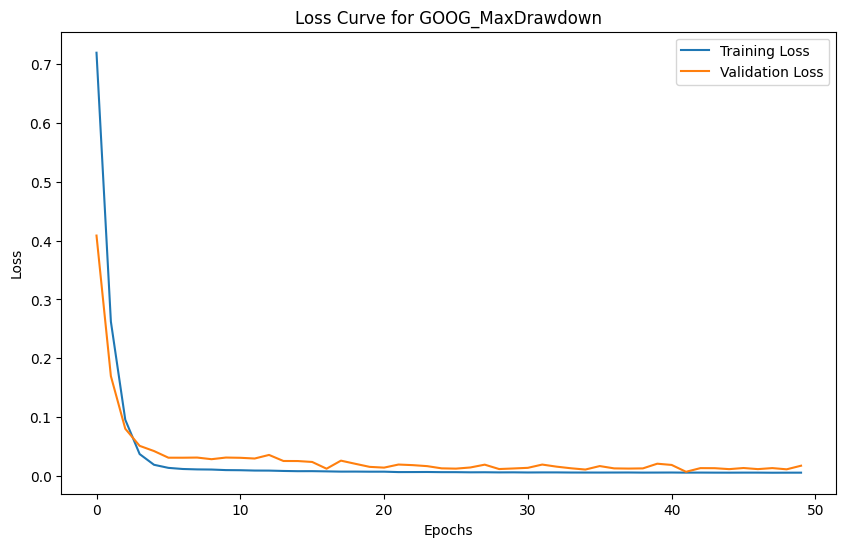

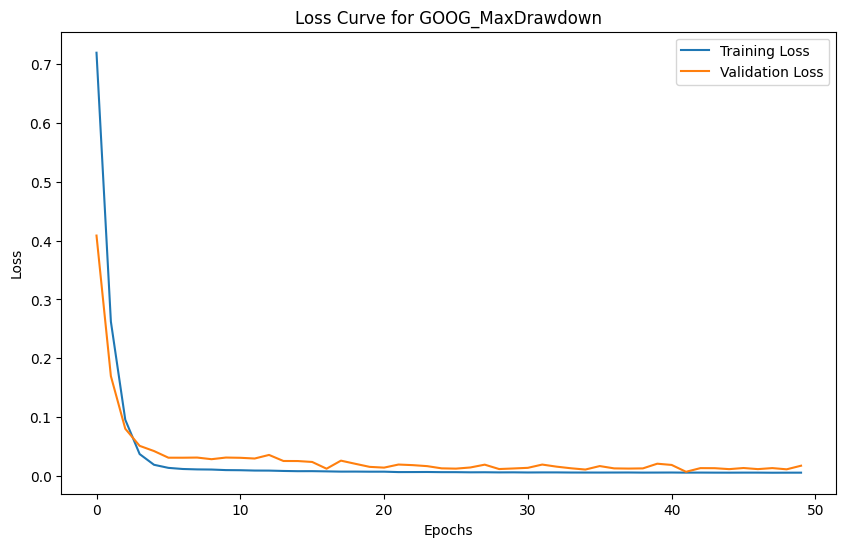

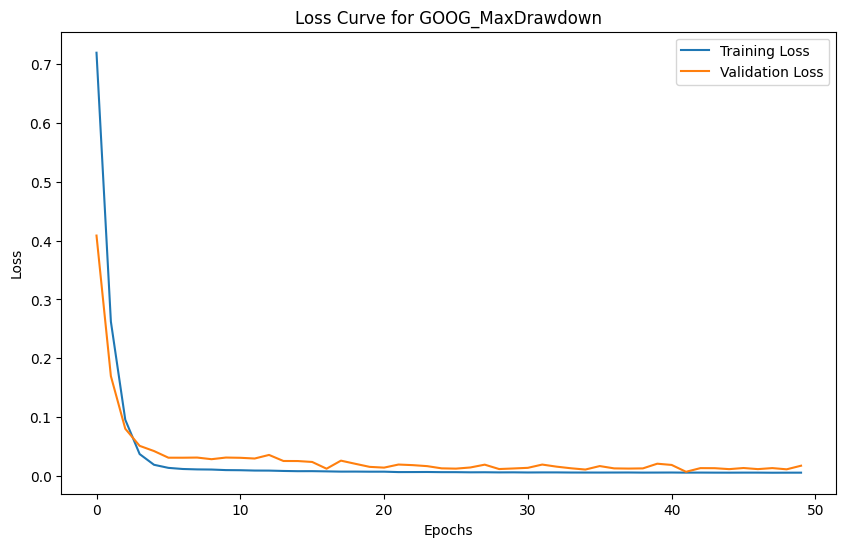

In [60]:
for name, target_variable in target_variables.items():


    # Plot the loss curve for the current model
    plot_loss(data['history'], data['target_variable'])

# Retraining with best perameters 

In [61]:
model_dict

{'Log Return': {'model': <Sequential name=sequential, built=True>,
  'y_pred': array([[0.00070699],
         [0.00070699],
         [0.00070699],
         ...,
         [0.00070699],
         [0.00070699],
         [0.00070699]], dtype=float32),
  'y_test': array([-0.01614804, -0.00740319, -0.00094756, ...,  0.01803115,
          0.00390731,  0.00808094]),
  'history': <keras.src.callbacks.history.History at 0x1ba77e4c200>,
  'target_variable': 'GOOG_LogReturn',
  'best_hps': <keras_tuner.src.engine.hyperparameters.hyperparameters.HyperParameters at 0x1ba4e3a6570>},
 'Volatility': {'model': <Sequential name=sequential_1, built=True>,
  'y_pred': array([[0.01769894],
         [0.01769851],
         [0.01769882],
         ...,
         [0.02071759],
         [0.02072227],
         [0.02072082]], dtype=float32),
  'y_test': array([0.0201956 , 0.02020962, 0.01929109, ..., 0.01842223, 0.01802454,
         0.01593796]),
  'history': <keras.src.callbacks.history.History at 0x1ba7fc689e0>,
  '

In [62]:
# Assume best_hps was obtained from the hyperparameter tuning process
def retrain_model(X_train_reshaped, X_test_reshaped, y_train, y_test, best_hps):
    # Rebuild the model with the best hyperparameters
    model = Sequential()
    
    # Bidirectional LSTM layer
    model.add(Bidirectional(LSTM(best_hps.get('lstm_units'), activation='relu', return_sequences=True, 
                                 kernel_regularizer=regularizers.l2(best_hps.get('l2')), 
                                 input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]))))
    
    # GRU layers
    model.add(GRU(best_hps.get('gru_units_1'), activation='relu', return_sequences=True))
    model.add(GRU(best_hps.get('gru_units_2'), activation='relu'))
    
    # Dropout layer
    model.add(Dropout(best_hps.get('dropout')))

    # Output layer
    model.add(Dense(1))

    # Compile the model with the best learning rate
    optimizer = tf.keras.optimizers.Nadam(learning_rate=best_hps.get('learning_rate'))
    model.compile(optimizer=optimizer, loss='mean_squared_error')

    # Retrain the model
    early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
    history = model.fit(X_train_reshaped, y_train, epochs=100, batch_size=32, validation_data=(X_test_reshaped, y_test), 
                        verbose=1, callbacks=[early_stopping])

    # Predict on test set
    y_pred = model.predict(X_test_reshaped)

    return model, y_pred, history
# Call this function with the best hyperparameters after tuning


Retraining Log Return model...
Epoch 1/100


E:\Personal\Risk_management_model\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


127/127 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.9121 - val_loss: 0.4099
Epoch 2/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3297 - val_loss: 0.1684
Epoch 3/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1188 - val_loss: 0.0745
Epoch 4/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0450 - val_loss: 0.0433
Epoch 5/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0205 - val_loss: 0.0296
Epoch 6/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0137 - val_loss: 0.0280
Epoch 7/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0120 - val_loss: 0.0269
Epoch 8/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0104 - val_loss: 0.0265
Epoch 9/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0100 - val_loss: 0.0273
Epoch 10/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0096 - val_loss: 0.0217
Epoch 11/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0090 - val_loss: 0.0278
Epoch 12/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

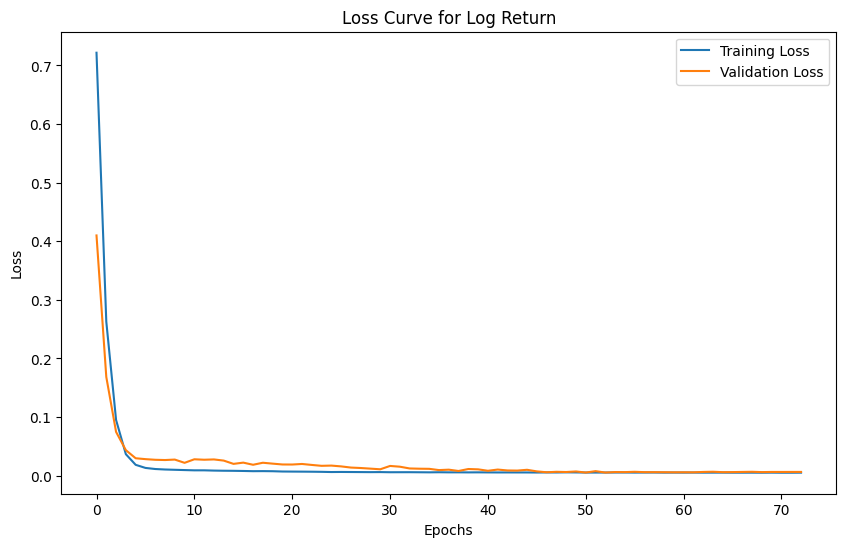

Number of exceedances for Log Return: 502
Exceedance ratio for Log Return: 0.49653808110781406


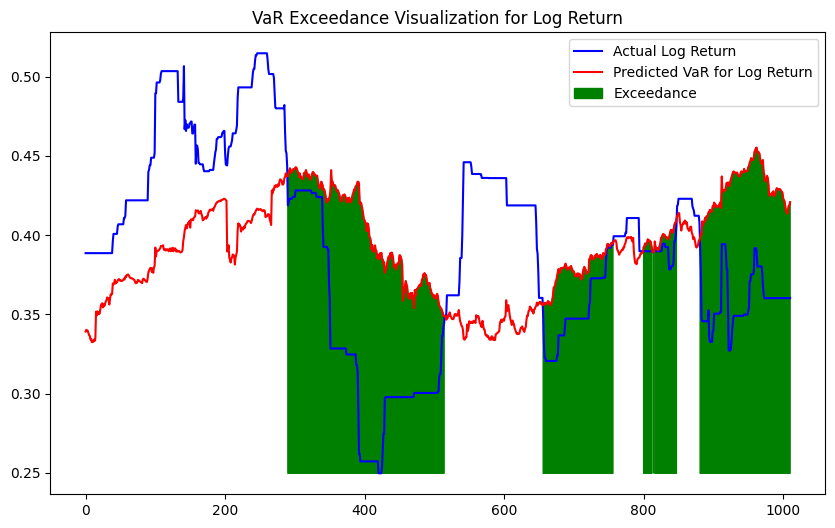

Log Return model retrained successfully with an exceedance ratio of 0.49653808110781406.

Retraining Volatility model...
Epoch 1/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.9043 - val_loss: 0.4052
Epoch 2/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3283 - val_loss: 0.1692
Epoch 3/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1179 - val_loss: 0.0752
Epoch 4/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0444 - val_loss: 0.0478
Epoch 5/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0207 - val_loss: 0.0366
Epoch 6/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0134 - val_loss: 0.0363
Epoch 7/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0117 - val_loss: 0.0297
Epoch 8/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0112 - val_loss: 0.0265
Epoch 9/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0099 - val_loss: 0.0274
Epoch 10/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0097 - val_loss: 0.0249
Epoch 11

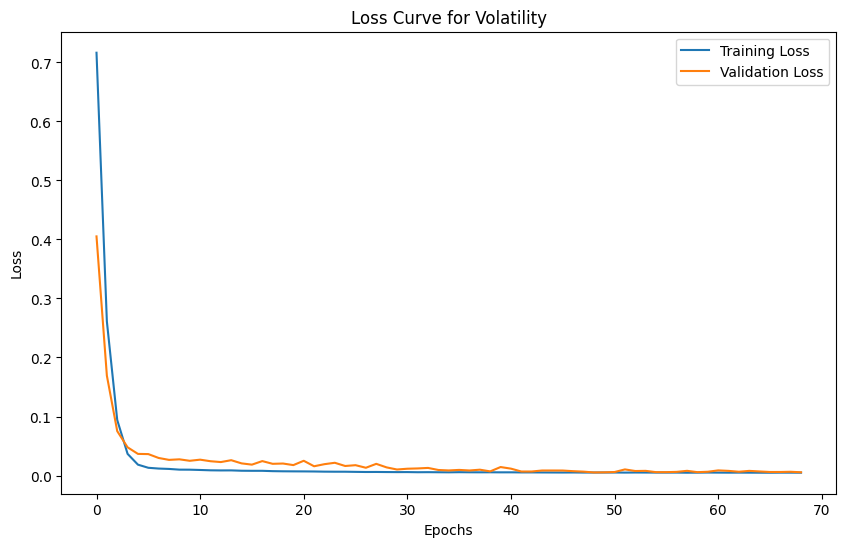

Number of exceedances for Volatility: 359
Exceedance ratio for Volatility: 0.35509396636993074


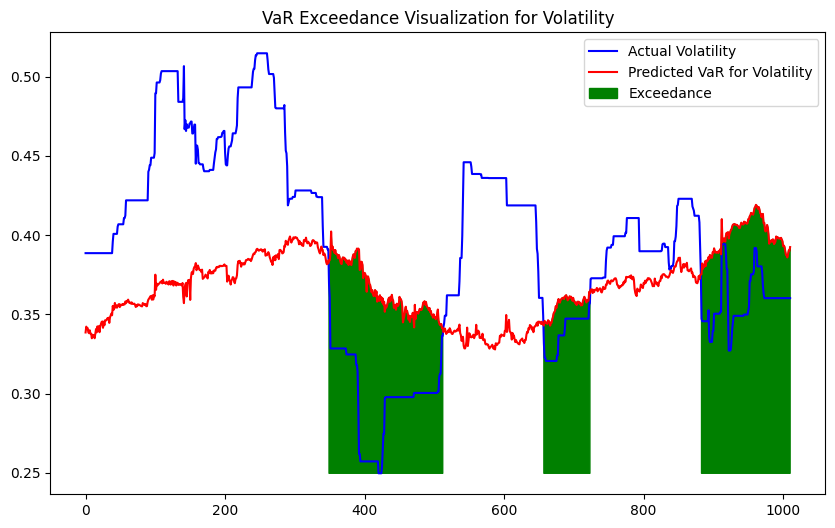

Volatility model retrained successfully with an exceedance ratio of 0.35509396636993074.

Retraining Max Drawdown model...
Epoch 1/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.9182 - val_loss: 0.4133
Epoch 2/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3357 - val_loss: 0.1706
Epoch 3/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1223 - val_loss: 0.0821
Epoch 4/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0457 - val_loss: 0.0574
Epoch 5/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0225 - val_loss: 0.0387
Epoch 6/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0151 - val_loss: 0.0305
Epoch 7/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0122 - val_loss: 0.0238
Epoch 8/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0123 - val_loss: 0.0297
Epoch 9/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0106 - val_loss: 0.0318
Epoch 10/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0102 - val_loss: 0.0310
Epoch 

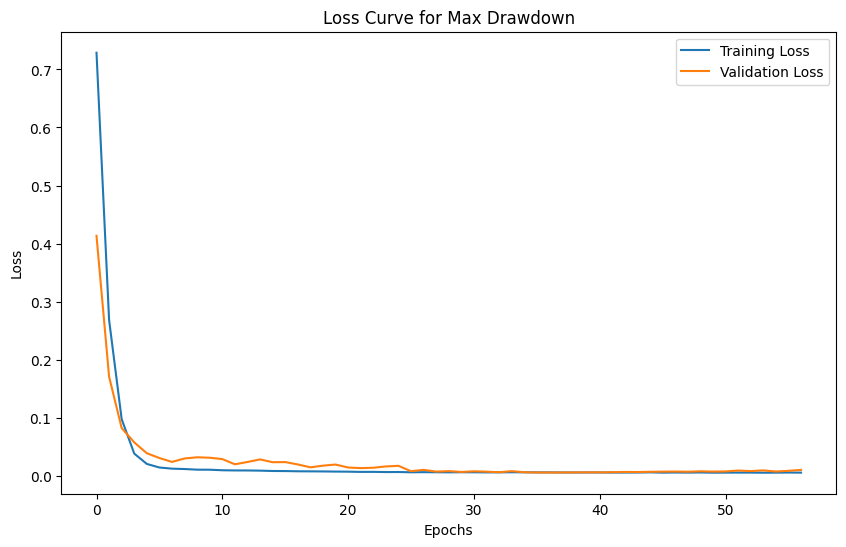

Number of exceedances for Max Drawdown: 442
Exceedance ratio for Max Drawdown: 0.437190900098912


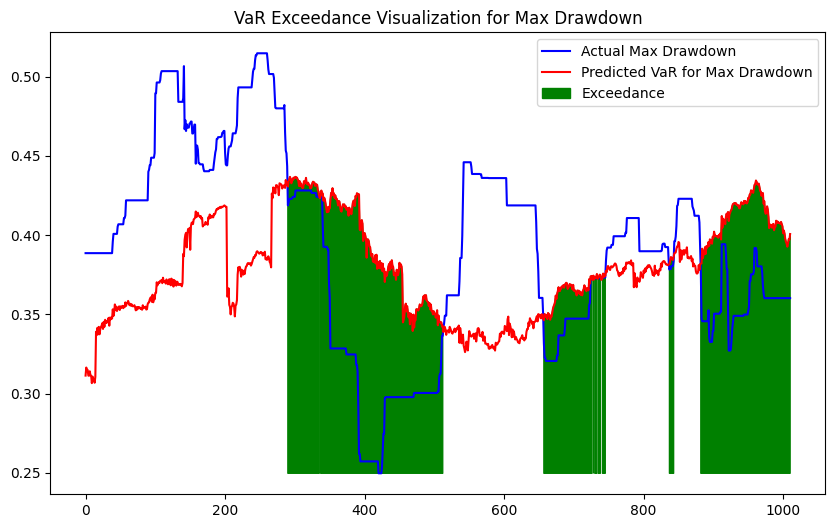

Max Drawdown model retrained successfully with an exceedance ratio of 0.437190900098912.



In [64]:
# Example to retrain all models using the best hyperparameters from model_dict
retrained_model_dict = {}

for target_variable, data in model_dict.items():
    print(f"Retraining {target_variable} model...")
    
    # Extract the best hyperparameters for the current model
    best_hps = data['best_hps']
    
   
    # Retrain the model using the best hyperparameters
    model, y_pred, history = retrain_model(X_train_reshaped, X_test_reshaped, y_train, y_test, best_hps)
    
    # Store the retrained model and results into retrained_model_dict
    retrained_model_dict[target_variable] = {
        'model': model,
        'y_pred': y_pred,
        'y_test': y_test,
        'history': history
    }
    
    print(f"{target_variable} model retrained successfully with an exceedance ratio of {exceedance_ratio}.\n")


In [65]:
def evaluate_retrained_models(retrained_model_dict):
    for target_variable, data in retrained_model_dict.items():
        print(f"Evaluating {target_variable} model...")
        # Extract the necessary data for evaluation
        y_test = data['y_test']
        y_pred = data['y_pred']
        history = data['history']
        
        # Plot the loss curve
        plot_loss(history, target_variable)
        
        # Backtest VaR (if needed)
        backtest_var(y_test, y_pred, target_variable)

Evaluating Log Return model...


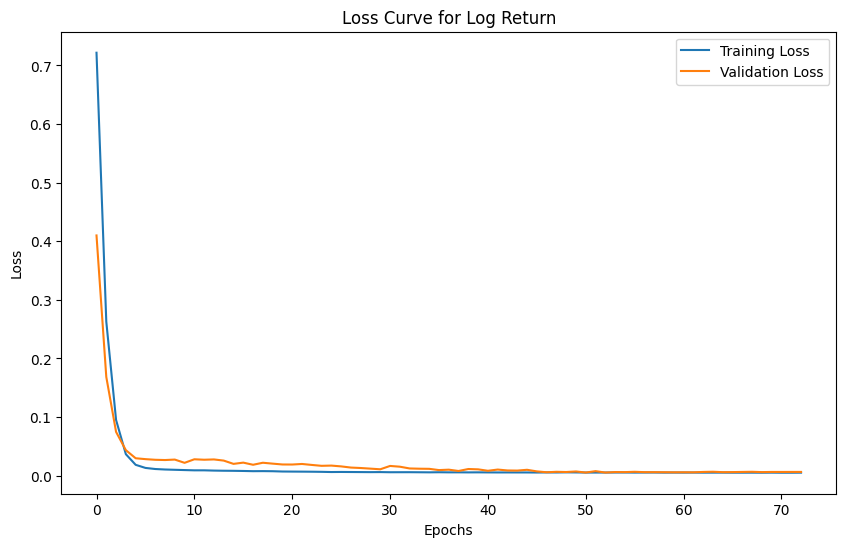

Number of exceedances for Log Return: 502
Exceedance ratio for Log Return: 0.49653808110781406


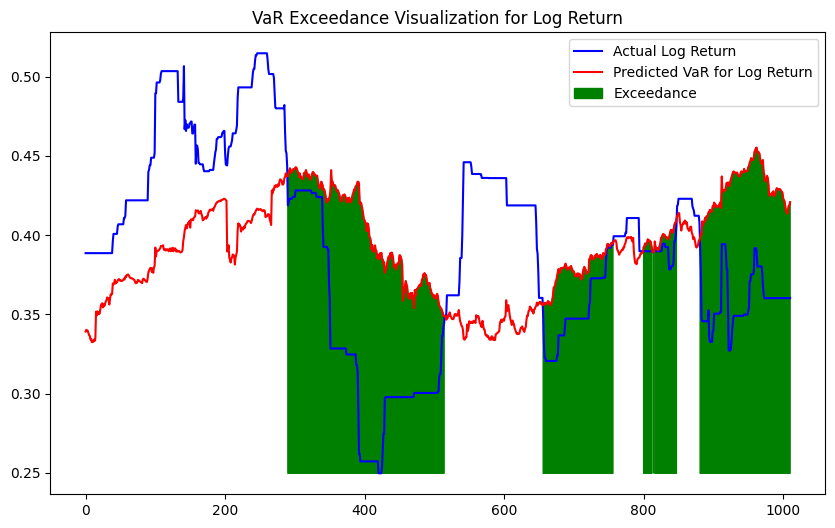

Evaluating Volatility model...


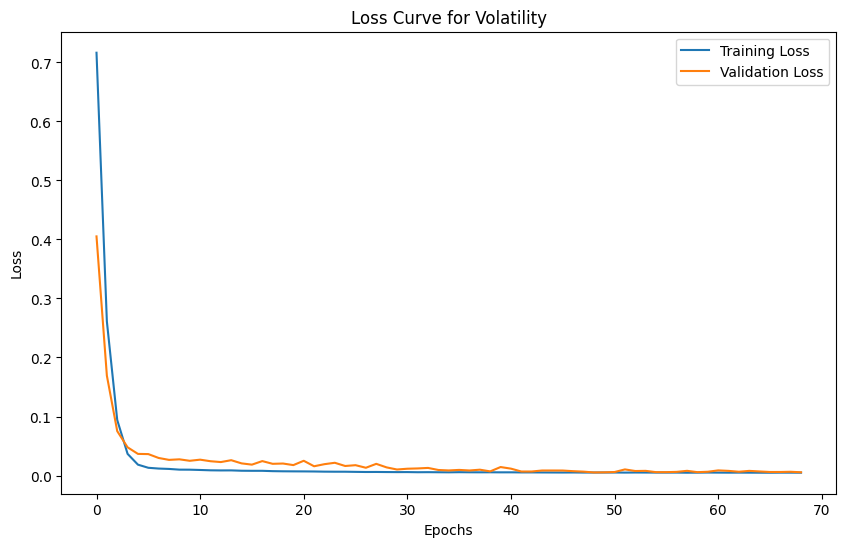

Number of exceedances for Volatility: 359
Exceedance ratio for Volatility: 0.35509396636993074


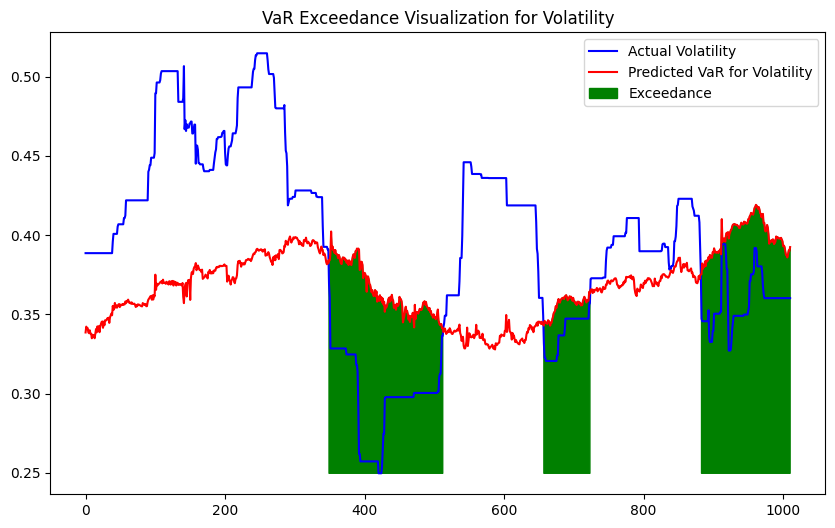

Evaluating Max Drawdown model...


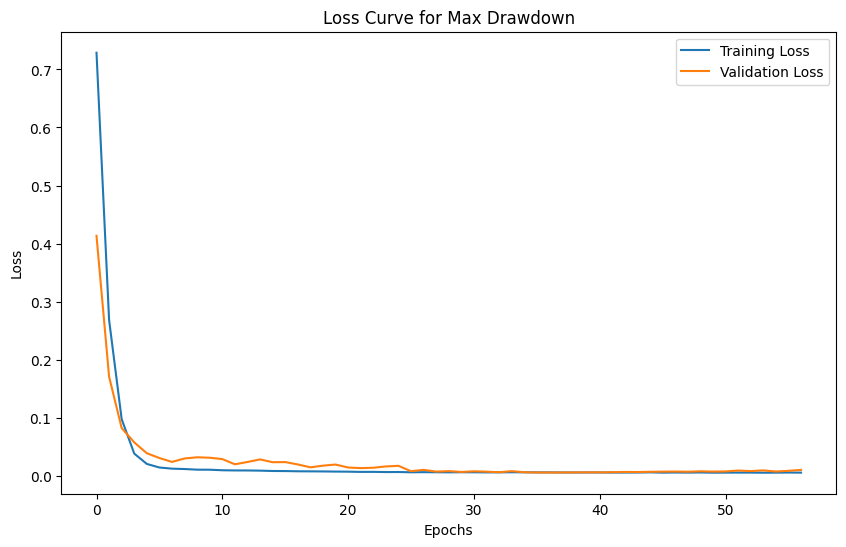

Number of exceedances for Max Drawdown: 442
Exceedance ratio for Max Drawdown: 0.437190900098912


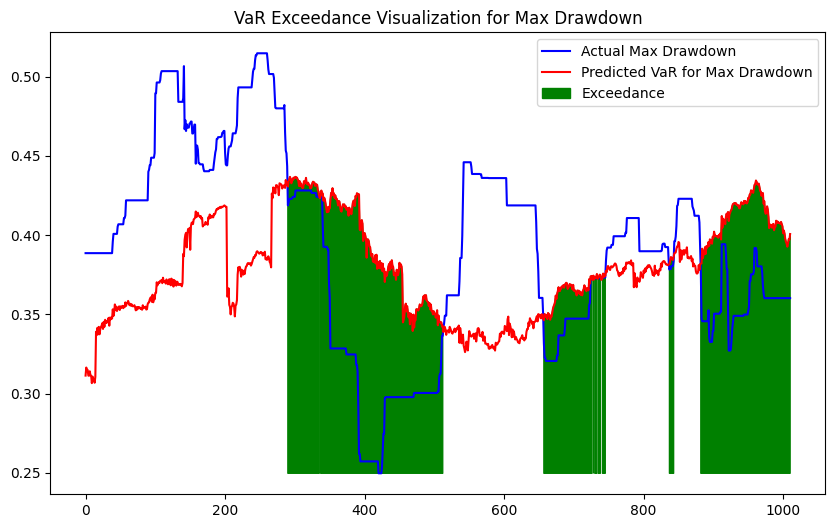

In [66]:
evaluate_retrained_models(retrained_model_dict)